In [56]:
import pystan
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [57]:
#importing the csv file
from google.colab import files 
uploaded = files.upload()

Saving call-center.csv to call-center (1).csv


In [58]:
waiting_times_day = np.loadtxt('call-center.csv')

#pre-proocessing the data and getting a list of waiting times for hour 13
current_time = 0
waiting_times_per_hour = [[] for _ in range(24)]  # Make 24 empty lists, one per hour
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

In [59]:
stan_code = """

data {  
    real<lower=0> alpha;  // fixed prior hyperparamater alpha
    real<lower=0> beta;  // fixed prior hyperparamater beta
    int<lower=0> N;      // number of waiting times
    real<lower=0> y[N];   // length of each waiting time (the actual data)
}

parameters {
    real<lower=0> lambda;   // Our posterior is supposed to be a distribution over lambda
                              
}


model {
    lambda ~ gamma(alpha, beta);  //prior
    y ~ exponential(lambda);      //likelihood
}
"""
stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f2bed4524286d21e1364131730139675 NOW.


In [60]:
stan_call_center_data = {
  'N': len(waiting_times_per_hour[13]),
  'alpha': 1,
  'beta': 0.25, 
  'y': waiting_times_per_hour[13]
}

results_call_center = stan_model.sampling(data=stan_call_center_data)
print(results_call_center)

Inference for Stan model: anon_model_f2bed4524286d21e1364131730139675.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda   6.35  8.4e-3   0.32   5.73   6.13   6.34   6.56    7.0   1459    1.0
lp__   324.43    0.02   0.71 322.42 324.27  324.7 324.87 324.92   1683    1.0

Samples were drawn using NUTS at Thu Feb 18 23:37:14 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


Posterior 98% confidence interval for lambda: [5.62752247 7.13868617]


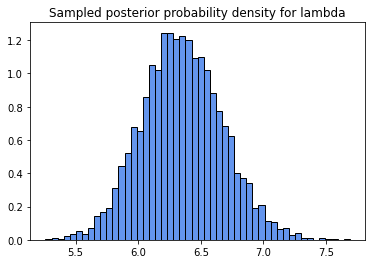

In [61]:
#getting the posterior samples
posterior_samples_call_center = results_call_center.extract()
#making a histogram of posterior lambda samples
plt.hist(posterior_samples_call_center['lambda'], bins=50, density=True, edgecolor='black', color='cornflowerblue')
plt.title('Sampled posterior probability density for lambda')
print(
    "Posterior 98% confidence interval for lambda:",
    np.percentile(posterior_samples_call_center['lambda'], [1, 99]))
plt.show()

In [63]:
data = np.array([3.54551763569501, 4.23799861761927, 4.72138425951628, -0.692265320368236, 3.04473513808788, 3.10721270732507, 3.42982225852764, 3.12153903971176, 3.60532628639808, 2.46561737557325, 1.64059465916131, 2.4621623937158, 2.76744495617481, 2.11580054750407, 5.14077208608354, 4.90288499104252, 1.43357579078348, 4.78997817363558, 1.93633438207439, 2.43698838097178, 3.95389148701877, 2.4242295507716, 2.90256268679023, 2.90931728045901, 0.658072819386888, 3.05946763895983, 3.42615331539605, 2.68842833004417, 2.35850130765166, 2.20014998540933, 4.73846511350084, 4.19839721414451, 2.11805510171691, -0.572742936038015, 0.389413982010623, 3.87846130744249, 1.34057656890858, 0.7235748351719, 5.11042369840174, 4.00747556696571, 3.18080956726965, 3.24677964069676, 5.1154659863626, 1.80276616697155, 0.305877679021404, -0.449168307882718, 4.63705561194774, 1.37783714058301, 4.9608149859515, 6.7764195802069, 1.75515522922399, 7.04457337435215, 0.625185284955128, 2.25130734369064, 2.19770178119255, 2.16858257249432, 6.25367644481438, 0.116081323476489, 2.06315857864341, 1.82409781471718, 5.15226741230987, 2.03408231293173, -1.12450854337596, 5.03511270642234, 2.03841989653263, 5.80911741751597, 2.31718128783245, 4.97575010580997, 3.34262752222776, -0.786983904253601, 0.777362359850013, 0.975825009321195, 3.76354577515958, 7.27215002907876, 1.35404089480189, 3.76567940257157, 3.48573993343334, 1.85976988586156, 1.93567061960716, 5.31071812003942, 2.96832987672751, 3.32378908637275, 2.61631960054551, 5.80897964052825, 4.95215217171488, 1.32036772796131, 3.79932542233371, 3.08108492766309, 2.6734110081666, -0.14251851138521, 2.48744375588965, 3.98463042123415, 6.32781680028, 4.0029172024315, 4.23210369459457, 1.71412938967325, 5.16492114963802, 2.53409673107906, 4.77346963973334, 3.34088878725551, 4.77681472750664, 3.81135755590976, 1.14054269983137, 1.42057452397702, 0.132142311125433, 7.12577254064672, 4.85422012781764, 4.15745720676399, 4.48763147363348, 1.56060322283629, 2.64821761542887, 1.26655351354548, 4.48497722937931, 4.3286302403783, 4.26157679512625, 4.0597558651364, 5.14051109132496, 2.5660348362221, 1.10764013818617, 0.386889523012303, 3.54150473246237, 3.57480214382351, 1.95150869584847, 2.70688970563118, 2.47971849820016, 6.50838037000679, 4.01511556826974, 1.11562740835344, 5.02637639472439, 4.38184491686864, 5.60423144047386, 2.40067408379298, 5.7849941378344, 2.37225791084559, 6.86031465910273, 4.09214858239736, 6.85994063692621, 3.62202415158781, -1.11220646958158, 3.73920971696866, 3.24533871512216, 1.28724203643002, 0.291152541773164, 0.368630935755111, 6.71607270510525, 5.42278455200833, 5.35188416119281, 2.305874586163, -1.85878097203032, 2.69877382351447, 4.84121860550417, 4.40973060799391, 5.04399320650774, 2.68632252661298, 6.06531610659912, 3.11881325011993, 3.45532087005125, 3.08442259840346, 4.43564424136733, 2.84252623135804, 1.50536798885106, 1.48868622407603, 2.07322837615663, 2.5476910210998, 5.66941808257884, 2.16731067416426, 2.49843958833905, 3.94586413879977, 0.316433764679541, -0.608937441815983, 2.5943436558557, 1.05516869528337, 2.1447601332725, 6.65846634141906, 2.1771555267834, 5.23953812029442, 3.53629759842647, 6.03263538017003, 3.85739159396599, 5.95093453004638, 1.12856987160476, 3.5559912886093, 2.21974864244489, 3.38471394882135, -1.90805399279409, 3.5113699258973, 4.49319955412346, 5.10507952638867, 1.08277895384184, 4.58403638422759, 1.37304994426824, 4.17566975753523, 3.36454182510378, 0.177136582644021, 2.91337423388405, 3.22796455457526, 2.80124198378441, 1.95189718582788, 3.37659263896246, -1.6463045238231])

In [62]:
stan_code_normal_inverse = """

data {  
    real<lower=0> alpha;  // fixed prior hyperparamater alpha
    real<lower=0> beta;  // fixed prior hyperparamater beta
    real<lower=0> mu0;  // fixed prior hyperparamater mu
    real<lower=0> nu0;  // fixed prior hyperparamater lambda
    int<lower=1> N;     // number of data
    real dat[N];         // the data itself
}

parameters {
    real mu;    // mean
    real sigma2; // variance
}


model {
    mu ~ normal(mu0, sqrt(sigma2/nu0));       //priors for mean and variance
    sigma2 ~ inv_gamma(alpha, beta);          //they are obtained using normal and inverse gamma distributions
    for(i in 1:N) {
        dat[i] ~ normal(mu, sqrt(sigma2));    //likelihood function
    }
}

"""
stan_model_normal_inverse = pystan.StanModel(model_code=stan_code_normal_inverse)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9f3e3646531f24486636e448e77a1b30 NOW.


In [64]:
stan_data_normal_inverse = {
  'alpha': 1.12,
  'beta': 0.4,
  'nu0': 0.054, 
  'mu0': 0,
  'N': len(data),
  'dat': data
}

results_normal_inverse = stan_model_normal_inverse.sampling(data=stan_data_normal_inverse)
print(results_normal_inverse)

Inference for Stan model: anon_model_9f3e3646531f24486636e448e77a1b30.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu       3.06  2.4e-3   0.13    2.8   2.97   3.06   3.15   3.33   3238    1.0
sigma2   3.61  6.8e-3   0.36   2.98   3.35   3.59   3.83   4.38   2815    1.0
lp__   -234.5    0.02   1.04 -237.2 -234.9 -234.2 -233.7 -233.5   1811    1.0

Samples were drawn using NUTS at Thu Feb 18 23:39:55 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


Posterior 95% confidence interval for mean: [2.79673721 3.3318978 ]
Posterior 95% confidence interval for variance: [2.97838148 4.38246321]


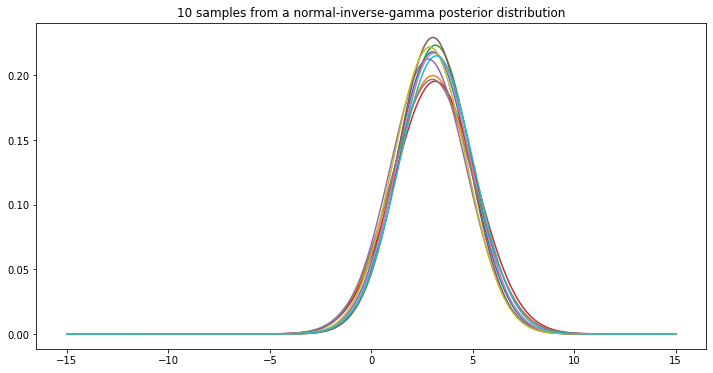

In [65]:
posterior_samples_normal_inverse = results_normal_inverse.extract()
num_samples = 10

#printing out confidence intervals for both parameters
print(
    "Posterior 95% confidence interval for mean:",
    np.percentile(posterior_samples_normal_inverse['mu'], [2.5, 97.5]))

print(
    "Posterior 95% confidence interval for variance:",
    np.percentile(posterior_samples_normal_inverse['sigma2'], [2.5, 97.5]))

#plotting 10 normal distributions that have mean and variance sampled from our posterior normal-inverse-gamma
plt.figure(figsize=(12, 6))
plot_x = np.linspace(-15, 15, 500)
for i in range(num_samples):
    plot_y = stats.norm.pdf(plot_x, loc=posterior_samples_normal_inverse['mu'][i], scale=np.sqrt(posterior_samples_normal_inverse['sigma2'][i]))
    plt.plot(plot_x, plot_y)
plt.title('%i samples from a normal-inverse-gamma posterior distribution' % num_samples)
plt.show()

In [66]:
from google.colab import files 
uploaded = files.upload()

Saving hrtem.csv to hrtem (1).csv


In [67]:
#obtaining the data and log transforming it
data_h = np.loadtxt('hrtem.csv')
print('%i data, min: %f, max: %f' % (len(data_h), min(data_h), max(data_h)))
log_data = np.log(data_h)

500 data, min: 1.051827, max: 28.942578


In [68]:
#here we are using new hyperparamters
stan_data_hrtem = {
  'alpha': 2,
  'beta': 5,
  'nu0': 0.1, 
  'mu0': 2.3,
  'N': len(log_data),
  'dat': log_data
}

#however, we can reuse the stan mode from the previous example because we have the same paramters and model
results_hrtem = stan_model_normal_inverse.sampling(data=stan_data_hrtem)
print(results_hrtem)

Inference for Stan model: anon_model_9f3e3646531f24486636e448e77a1b30.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu       1.89  5.9e-4   0.03   1.83   1.87   1.89   1.91   1.95   2932    1.0
sigma2    0.5  5.6e-4   0.03   0.44   0.47    0.5   0.52   0.56   3076    1.0
lp__   -75.33    0.03   1.04 -78.15 -75.74 -75.01  -74.6 -74.33   1591    1.0

Samples were drawn using NUTS at Thu Feb 18 23:40:35 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


Posterior 95% confidence interval for mean: [1.82859865 1.95476567]
Posterior 95% confidence interval for variance: [0.43890447 0.5596013 ]


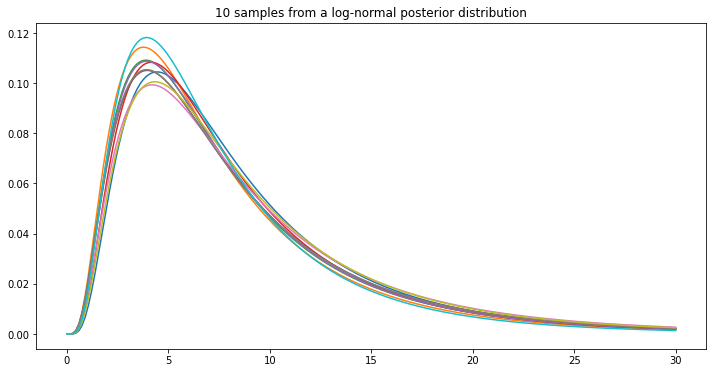

In [69]:
posterior_samples_hrtem = results_hrtem.extract()

#obtaining 10 samples of means and variance from the posterior distribution
variance_samples = np.random.choice(posterior_samples_hrtem['sigma2'], num_samples)
mean_samples = np.random.choice(posterior_samples_hrtem['mu'], num_samples)
 
#printing out confidence intervals
print(
    "Posterior 95% confidence interval for mean:",
    np.percentile(posterior_samples_hrtem['mu'], [2.5, 97.5]))

print(
    "Posterior 95% confidence interval for variance:",
    np.percentile(posterior_samples_hrtem['sigma2'], [2.5, 97.5]))

plt.figure(figsize=(12, 6))
plot_x = np.linspace(0, 30, 200)
for i in range(num_samples): 
    plot_y = stats.lognorm.pdf(plot_x, np.sqrt(variance_samples[i]), scale=np.exp(mean_samples[i]))
    plt.plot(plot_x, plot_y)
plt.title('%i samples from a log-normal posterior distribution' % num_samples)
plt.show()